In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('MSFT.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...,...
9444,2023-09-01,331.309998,331.989990,326.779999,328.660004,328.660004,14931200
9445,2023-09-05,329.000000,334.850006,328.660004,333.549988,333.549988,18553900
9446,2023-09-06,333.380005,334.459991,330.179993,332.880005,332.880005,17535800
9447,2023-09-07,331.290009,333.079987,329.029999,329.910004,329.910004,18381000


In [4]:
df = df[['Date','Close']]

In [5]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9444,2023-09-01,328.660004
9445,2023-09-05,333.549988
9446,2023-09-06,332.880005
9447,2023-09-07,329.910004


In [6]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9444    2023-09-01
9445    2023-09-05
9446    2023-09-06
9447    2023-09-07
9448    2023-09-08
Name: Date, Length: 9449, dtype: object

In [7]:
def str_to_dateTime(s):
    split = s.split('-')
    year , month , day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year , month = month , day = day)
datetime_object = str_to_dateTime('1986-03-13')
datetime_object

datetime.datetime(1986, 3, 13, 0, 0)

In [8]:
df['Date'] = df['Date'].apply(str_to_dateTime)


In [9]:
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9444   2023-09-01
9445   2023-09-05
9446   2023-09-06
9447   2023-09-07
9448   2023-09-08
Name: Date, Length: 9449, dtype: datetime64[ns]

In [10]:
df.index = df.pop('Date')

In [11]:
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-09-01,328.660004
2023-09-05,333.549988
2023-09-06,332.880005


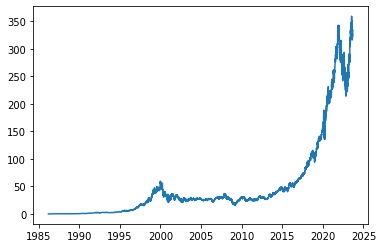

In [12]:
plt.plot(df.index , df['Close'])

In [13]:
# To convert problem to supervised learning problem

def df_to_windowed_df(dataframe , firstDate_str , lastDate_str ,n=3):
    first_date = str_to_dateTime(firstDate_str)
    last_date  = str_to_dateTime(lastDate_str)

    target_date = first_date
  
    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
    
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
        if last_time:
            break
    
        target_date = next_date

        if target_date == last_date:
            last_time = True
    
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
  
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
  
    ret_df['Target'] = Y

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2023-09-08', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
614,2023-09-01,328.410004,328.790009,327.760010,328.660004
615,2023-09-05,328.790009,327.760010,328.660004,333.549988
616,2023-09-06,327.760010,328.660004,333.549988,332.880005
617,2023-09-07,328.660004,333.549988,332.880005,329.910004


In [14]:
# converting to numpy array so that we can feed it directly into tensorflow model

def windowed_df_to_date_x_y(windowed_df):
    df_as_np = windowed_df.to_numpy()
    
    dates = df_as_np[:,0]
    middle_matrix = df_as_np[: , 1:-1]
    x = middle_matrix.reshape(len(dates) , middle_matrix.shape[1],1) # 1 because we are using only 1 attribute(closing) => univariate
    y = df_as_np[:, -1]
    return dates , x.astype(np.float32),y.astype(np.float32)
dates , x , y = windowed_df_to_date_x_y(windowed_df)
dates.shape , x.shape , y.shape

((619,), (619, 3, 1), (619,))

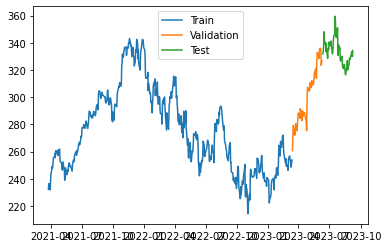

In [15]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train , x_train , y_train = dates[:q_80] , x[:q_80] , y[:q_80]

dates_val , x_val , y_val = dates[q_80 : q_90] , x[q_80 :q_90] , y[q_80:q_90]
dates_test , x_test , y_test = dates[q_90:] , x[q_90:] , y[q_90:]
plt.plot(dates_train , y_train) 
plt.plot(dates_val , y_val)
plt.plot(dates_test , y_test)
plt.legend(['Train' , 'Validation' , 'Test'])

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])

model.compile(loss = 'mse',
               optimizer = Adam(learning_rate = 0.001),
              metrics = ['mean_absolute_error'])
model.fit(x_train , y_train , validation_data = (x_val , y_val), epochs = 100)

Epoch 1/100
16/16 [==============================] - 10s 108ms/step - loss: 76123.4844 - mean_absolute_error: 274.2586 - val_loss: 89647.5547 - val_mean_absolute_error: 298.7368
Epoch 2/100
16/16 [==============================] - 0s 13ms/step - loss: 75633.4531 - mean_absolute_error: 273.3638 - val_loss: 88940.1484 - val_mean_absolute_error: 297.5504
Epoch 3/100
16/16 [==============================] - 0s 14ms/step - loss: 74665.3750 - mean_absolute_error: 271.5875 - val_loss: 87322.7422 - val_mean_absolute_error: 294.8191
Epoch 4/100
16/16 [==============================] - 0s 13ms/step - loss: 72751.8047 - mean_absolute_error: 268.0420 - val_loss: 84644.3984 - val_mean_absolute_error: 290.2414
Epoch 5/100
16/16 [==============================] - 0s 14ms/step - loss: 69524.7422 - mean_absolute_error: 261.9393 - val_loss: 79919.8672 - val_mean_absolute_error: 281.9846
Epoch 6/100
16/16 [==============================] - 0s 14ms/step - loss: 64040.3359 - mean_absolute_error: 251.2364 -

Epoch 49/100
16/16 [==============================] - 0s 15ms/step - loss: 47.1421 - mean_absolute_error: 5.4671 - val_loss: 34.0187 - val_mean_absolute_error: 4.4865
Epoch 50/100
16/16 [==============================] - 0s 14ms/step - loss: 53.2278 - mean_absolute_error: 5.9273 - val_loss: 40.7185 - val_mean_absolute_error: 5.2902
Epoch 51/100
16/16 [==============================] - 0s 13ms/step - loss: 38.6560 - mean_absolute_error: 4.8698 - val_loss: 32.6402 - val_mean_absolute_error: 4.4275
Epoch 52/100
16/16 [==============================] - 0s 14ms/step - loss: 31.5768 - mean_absolute_error: 4.3778 - val_loss: 31.8714 - val_mean_absolute_error: 4.3888
Epoch 53/100
16/16 [==============================] - 0s 14ms/step - loss: 39.2348 - mean_absolute_error: 4.9462 - val_loss: 29.7974 - val_mean_absolute_error: 4.5051
Epoch 54/100
16/16 [==============================] - 0s 14ms/step - loss: 32.5249 - mean_absolute_error: 4.5039 - val_loss: 29.7749 - val_mean_absolute_error: 4.432

16/16 [==============================] - 0s 12ms/step - loss: 28.4057 - mean_absolute_error: 4.1339 - val_loss: 29.3482 - val_mean_absolute_error: 3.9395
Epoch 99/100
16/16 [==============================] - 0s 14ms/step - loss: 28.0239 - mean_absolute_error: 4.1385 - val_loss: 28.8158 - val_mean_absolute_error: 3.9857
Epoch 100/100
16/16 [==============================] - 0s 13ms/step - loss: 27.3213 - mean_absolute_error: 4.0247 - val_loss: 36.0308 - val_mean_absolute_error: 4.2704


16/16 [==============================] - 1s 4ms/step


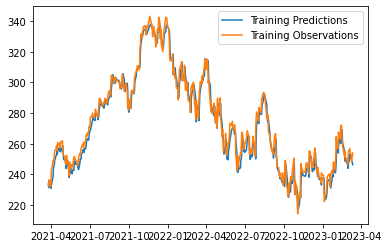

In [17]:
train_pred = model.predict(x_train).flatten()

plt.plot(dates_train , train_pred)
plt.plot(dates_train , y_train)
plt.legend(['Training Predictions' , 'Training Observations'])

2/2 [==============================] - 0s 8ms/step


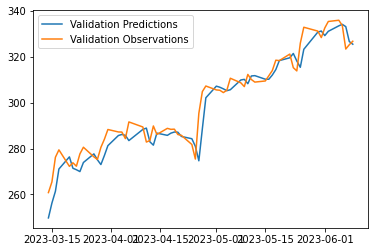

In [18]:
val_pred = model.predict(x_val).flatten()

plt.plot(dates_val , val_pred)
plt.plot(dates_val , y_val)
plt.legend(['Validation Predictions' , 'Validation Observations'])

2/2 [==============================] - 0s 0s/step


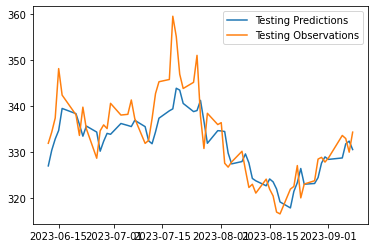

In [19]:
test_pred = model.predict(x_test).flatten()

plt.plot(dates_test , test_pred)
plt.plot(dates_test , y_test)
plt.legend(['Testing Predictions' , 'Testing Observations'])

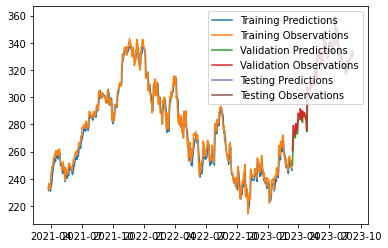

In [20]:
plt.plot(dates_train , train_pred)
plt.plot(dates_train , y_train)
plt.plot(dates_val , val_pred)
plt.plot(dates_val , y_val)
plt.plot(dates_test , test_pred)
plt.plot(dates_test , y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [21]:
from copy import deepcopy
recursive_pred = []
recursive_dates = np.concatenate([dates_val , dates_test])

for target in recursive_dates:
    last_window = deepcopy(x_train[-1])
    next_pred = model.predict(np.array([last_window])).flatten()
    recursive_pred.append(next_pred)
    last_window[-1] = next_pred

1/1 [==============================] - 0s 49ms/step


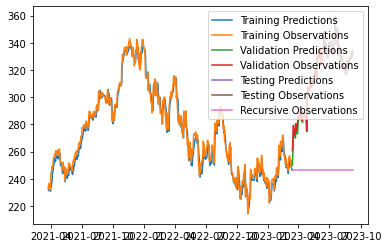

In [22]:
plt.plot(dates_train , train_pred)
plt.plot(dates_train , y_train)
plt.plot(dates_val , val_pred)
plt.plot(dates_val , y_val)
plt.plot(dates_test , test_pred)
plt.plot(dates_test , y_test)
plt.plot(recursive_dates , recursive_pred)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Observations',
           'Recursive Predictions'])